# Regression in PyTorch

Repeating the procedure in PyTorch will be instructive for building neural networks in PyTorch later

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn, optim

## Loading data

Load the penguin dataset (a CSV file) using the `pandas` module

In [3]:
input_penguins_df = pd.read_csv("../Downloads/penguins.csv")
penguins_df = input_penguins_df.dropna(inplace=False)

For PyTorch, we need to load the data into tensors, luckily we're familiar with these already. They need to be columns hence the reshaping

In [54]:
input_data = torch.tensor(penguins_df["flipper_length_mm"].values, dtype=torch.float32).reshape(-1,1)
target     = torch.tensor(penguins_df["body_mass_g"].values,       dtype=torch.float32).reshape(-1,1)

Our model here is a "linear" layer which for the simple linear regression case, will map a single value $X_i$ to a single value $y_i$

In [5]:
model = nn.Linear(1, 1)

We can examine the model through the following:

In [6]:
print(model)
print(list(model.parameters()))

Linear(in_features=1, out_features=1, bias=True)
[Parameter containing:
tensor([[0.6041]], requires_grad=True), Parameter containing:
tensor([0.2433], requires_grad=True)]


It shows we've defined a Linear model with one input, one output, and biases turned on (which is just the y-intercept for simple linear regression). The model parameters are the things which will alter as we train - just now they're set to random values

## Training

In the sklearn case, an analytic solution for ordinary least squares was implicitly used to solve the regression problem.

In PyTorch, the same problem is solved iteratively by minimising some loss function and updating our two model paramters. We will use MSELoss which we saw in the lecture slides: it is a very common choice for regression problems.

In [7]:
loss_function = nn.MSELoss()
optimizer = optim.Rprop(model.parameters())

Now the iteration itself, a `for` loop which:
* Makes a prediction based on the current model
* Computes the loss ~ the difference between the prediction and the true value
* Updates the model

This cell is slightly more verbose, so make sure you understand what each line is doing

In [8]:
# keep track of the loss every epoch. This is only for visualisation
losses = []

N_epochs = 1000

for epoch in range(N_epochs):
    # tell the optimizer to begin an optimization step
    optimizer.zero_grad()

    # use the model as a prediction function: features → prediction
    predictions = model(input_data)

    # compute the loss (χ²) between these predictions and the intended targets
    loss = loss_function(predictions, target)

    # tell the loss function and optimizer to end an optimization step
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    # Print the loss every 10 epochs
    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch + 1}/{N_epochs}], Loss: {loss.item():.4f}')

Epoch [1/1000], Loss: 17325142.0000
Epoch [2/1000], Loss: 17308450.0000
Epoch [3/1000], Loss: 17288428.0000
Epoch [4/1000], Loss: 17264422.0000
Epoch [5/1000], Loss: 17235634.0000
Epoch [6/1000], Loss: 17201120.0000
Epoch [7/1000], Loss: 17159752.0000
Epoch [8/1000], Loss: 17110176.0000
Epoch [9/1000], Loss: 17050782.0000
Epoch [10/1000], Loss: 16979648.0000
Epoch [11/1000], Loss: 16894488.0000
Epoch [12/1000], Loss: 16792582.0000
Epoch [13/1000], Loss: 16670709.0000
Epoch [14/1000], Loss: 16525063.0000
Epoch [15/1000], Loss: 16351144.0000
Epoch [16/1000], Loss: 16143681.0000
Epoch [17/1000], Loss: 15896510.0000
Epoch [18/1000], Loss: 15602473.0000
Epoch [19/1000], Loss: 15253327.0000
Epoch [20/1000], Loss: 14839679.0000
Epoch [21/1000], Loss: 14350969.0000
Epoch [22/1000], Loss: 13775563.0000
Epoch [23/1000], Loss: 13100976.0000
Epoch [24/1000], Loss: 12314375.0000
Epoch [25/1000], Loss: 11403432.0000
Epoch [26/1000], Loss: 10357788.0000
Epoch [27/1000], Loss: 9171398.0000
Epoch [28/1

# Task 1
* Try with a small number of epochs e.g. 30 and see what the loss curve looks like: is the model converged?
* Reset the model parameters and see how many it takes for the model to converge. Beware of local minima!

We've printed the loss every 10 epochs to keep track that it is decreasing as we want.
This is good practice for training ML models, rather than just waiting until all epochs have run and then examining the result.
There are also many highly advanced tools for monitoring training: wandb.ai and TensorBoard are a couple of examples

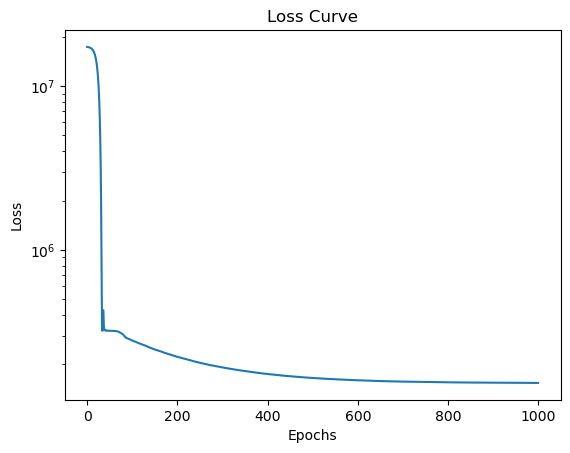

In [9]:
def plot_loss_curve(losses):
    plt.plot(losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.title('Loss Curve')
    plt.show()

plot_loss_curve(losses)

In [34]:
# USE THIS TO RESET THE MODEL PARAMETERS!!!
model.reset_parameters()
optimizer = optim.Rprop(model.parameters())

## Evaluating the model

Evaluating the model on the input data is as simple as a passing it as an argument. This returns a tensor with the derivates attached, so we have to detach these and map back to numpy

In [10]:
y_out = model(input_data)
y_pred = y_out.detach()

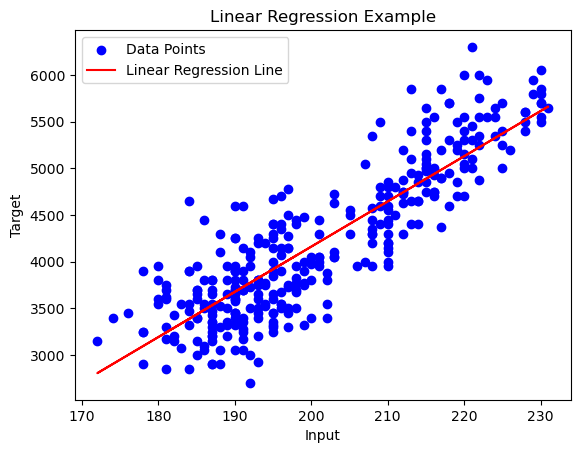

In [11]:
# Plot the original data and the linear regression line
plt.scatter(input_data, target, color='blue', label='Data Points')
plt.plot(input_data, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('Input')
plt.ylabel('Target')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

We can use the regression performance metrics from before to evaluate the performance of the model. Build a function which computes the R-squared score from it's definition:
$ R^2 = 1 - \frac{\sum (y_{\text{true}} - y_{\text{pred}})^2}{\sum (y_{\text{true}} - \bar{y_{\text{true}}})^2}$

In [12]:
# R-squared metric 
def r_squared(y_true, y_pred):
    ss_res = torch.sum((y_true - y_pred) ** 2)
    ss_tot = torch.sum((y_true - torch.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

In [13]:
r_squared_value = r_squared(target, y_pred)
print(r_squared_value)

tensor(0.7612)


# Task 2: Multilinear Regression in PyTorch

Extend to multilinear regression. You will need to adapt the `Linear` model to take more than single inputs.

In [20]:
input_data2D = torch.tensor(penguins_df[["flipper_length_mm" , "bill_depth_mm"]].values, dtype=torch.float32)
target     = torch.tensor(penguins_df["body_mass_g"].values,       dtype=torch.float32).reshape(-1,1)

In [89]:
model2 = nn.Linear(2, 1)

In [90]:
loss_function = nn.MSELoss()
optimizer = optim.Rprop(model2.parameters())

In [91]:
# keep track of the loss every epoch. This is only for visualisation
losses = []

N_epochs = 3000

for epoch in range(N_epochs):
    # tell the optimizer to begin an optimization step
    optimizer.zero_grad()

    # use the model as a prediction function: features → prediction
    predictions = model2(input_data2D)

    # compute the loss (χ²) between these predictions and the intended targets
    loss = loss_function(predictions, target)

    # tell the loss function and optimizer to end an optimization step
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    # Print the loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{N_epochs}], Loss: {loss.item():.4f}')

Epoch [10/3000], Loss: 19015074.0000
Epoch [20/3000], Loss: 16561633.0000
Epoch [30/3000], Loss: 5220054.5000
Epoch [40/3000], Loss: 386087.5312
Epoch [50/3000], Loss: 357350.3750
Epoch [60/3000], Loss: 344261.4375
Epoch [70/3000], Loss: 317539.4062
Epoch [80/3000], Loss: 292216.8750
Epoch [90/3000], Loss: 268854.8125
Epoch [100/3000], Loss: 251389.8125
Epoch [110/3000], Loss: 240848.7188
Epoch [120/3000], Loss: 234574.7344
Epoch [130/3000], Loss: 229305.4219
Epoch [140/3000], Loss: 225973.7344
Epoch [150/3000], Loss: 223796.0781
Epoch [160/3000], Loss: 222391.9062
Epoch [170/3000], Loss: 221198.9844
Epoch [180/3000], Loss: 220659.2656
Epoch [190/3000], Loss: 220373.0000
Epoch [200/3000], Loss: 220158.7812
Epoch [210/3000], Loss: 219990.8281
Epoch [220/3000], Loss: 219820.6406
Epoch [230/3000], Loss: 219561.1250
Epoch [240/3000], Loss: 218847.1875
Epoch [250/3000], Loss: 217831.4062
Epoch [260/3000], Loss: 214937.5625
Epoch [270/3000], Loss: 213315.2969
Epoch [280/3000], Loss: 209226.6

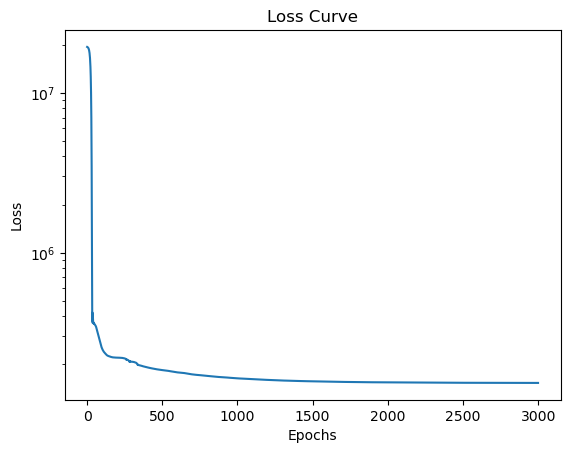

In [92]:
plot_loss_curve(losses)

In [94]:
y_out2 = model2(input_data2D)
y_pred2 = y_out2.detach()

In [19]:
input_data2D

NameError: name 'input_data2D' is not defined

# Neural Networks

Implementing the neural network part is trivial. We simply replace our `model` with one defined by `nn.Sequential`, as shown.

In [29]:
model_DNN = nn.Sequential(nn.Linear(1, 50),
                          nn.ReLU(),
                          nn.Linear(50, 1))

This has three parts

In [30]:
# Optimiser and loss function
loss_function = nn.MSELoss()
optimizer = optim.Rprop(model_DNN.parameters())

In [31]:
# Trainging loop
# keep track of the loss every epoch. This is only for visualisation
losses = []
N_epochs = 3000
for epoch in range(N_epochs):
    # tell the optimizer to begin an optimization step
    optimizer.zero_grad()

    # use the model as a prediction function: features → prediction
    predictions = model_DNN(input_data)

    # compute the loss (χ²) between these predictions and the intended targets
    loss = loss_function(predictions, target)

    # tell the loss function and optimizer to end an optimization step
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    # Print the loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{N_epochs}], Loss: {loss.item():.4f}')

Epoch [10/3000], Loss: 12473858.0000
Epoch [20/3000], Loss: 498771.4062
Epoch [30/3000], Loss: 321052.8438
Epoch [40/3000], Loss: 320657.5000
Epoch [50/3000], Loss: 319400.0625
Epoch [60/3000], Loss: 317318.2500
Epoch [70/3000], Loss: 310457.8438
Epoch [80/3000], Loss: 297490.4375
Epoch [90/3000], Loss: 284200.4688
Epoch [100/3000], Loss: 272336.2500
Epoch [110/3000], Loss: 258569.2656
Epoch [120/3000], Loss: 255069.1719
Epoch [130/3000], Loss: 240938.9531
Epoch [140/3000], Loss: 220338.1875
Epoch [150/3000], Loss: 213898.4688
Epoch [160/3000], Loss: 191914.5156
Epoch [170/3000], Loss: 176794.1250
Epoch [180/3000], Loss: 172919.8281
Epoch [190/3000], Loss: 165652.3594
Epoch [200/3000], Loss: 159155.7812
Epoch [210/3000], Loss: 155413.2969
Epoch [220/3000], Loss: 154513.5312
Epoch [230/3000], Loss: 154051.4531
Epoch [240/3000], Loss: 153880.7344
Epoch [250/3000], Loss: 153805.4531
Epoch [260/3000], Loss: 153794.2969
Epoch [270/3000], Loss: 153789.6875
Epoch [280/3000], Loss: 153789.7188

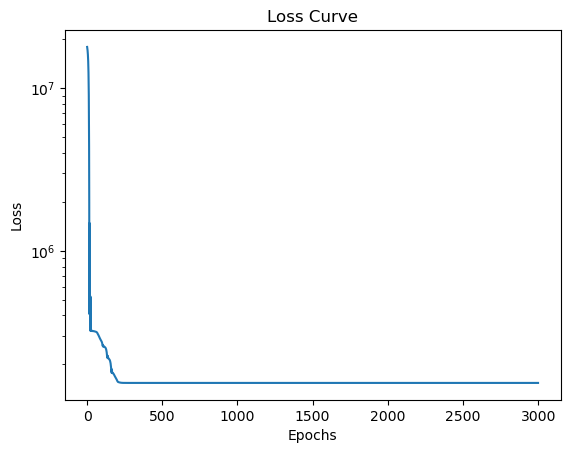

In [32]:
plot_loss_curve(losses)

In [33]:
r_squared_value = r_squared(target, y_pred)
print(r_squared_value)

tensor(0.7612)


In [68]:
input_data/input_data.mean()

tensor([[0.9006],
        [0.9255],
        [0.9703],
        [0.9604],
        [0.9454],
        [0.9006],
        [0.9703],
        [0.9056],
        [0.9504],
        [0.9852],
        [0.9205],
        [0.9703],
        [0.9803],
        [0.9156],
        [0.9653],
        [0.8658],
        [0.8957],
        [0.9405],
        [0.9205],
        [0.8957],
        [0.9305],
        [0.9106],
        [0.9305],
        [0.8559],
        [0.8957],
        [0.8857],
        [0.8857],
        [0.9355],
        [0.9156],
        [0.9703],
        [0.9753],
        [0.9454],
        [0.8957],
        [0.9006],
        [0.9156],
        [0.9056],
        [0.9703],
        [0.9255],
        [0.9753],
        [0.9205],
        [0.9454],
        [0.9056],
        [0.9454],
        [0.9504],
        [0.9255],
        [0.9355],
        [0.9454],
        [0.9952],
        [0.9305],
        [0.9504],
        [0.9255],
        [0.9604],
        [0.9006],
        [0.9653],
        [0.9205],
        [0

In [73]:
# Perform all this again with normalized data 
input_data_normalised = (input_data - input_data.mean())/ input_data.std()
target_normalised = (target - target.mean())/ target.std()
# model_cheese = nn.Linear(1, 1)
model_DNN_norm = nn.Sequential(nn.Linear(1, 50),
                              nn.ReLU(),
                              nn.Linear(50, 1))


loss_function = nn.MSELoss()
optimizer = optim.Rprop(model_DNN_norm.parameters())
# keep track of the loss every epoch. This is only for visualisation
losses = []
N_epochs = 200
for epoch in range(N_epochs):   
    # tell the optimizer to begin an optimization step
    optimizer.zero_grad()

    # use the model as a prediction function: features → prediction
    predictions = model_DNN_norm(input_data_normalised)

    # compute the loss (χ²) between these predictions and the intended targets
    loss = loss_function(predictions, target_normalised)

    # tell the loss function and optimizer to end an optimization step
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    # Print the loss every 10 epochs
    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch + 1}/{N_epochs}], Loss: {loss.item():.4f}')

Epoch [1/200], Loss: 1.2711
Epoch [2/200], Loss: 0.9899
Epoch [3/200], Loss: 0.7152
Epoch [4/200], Loss: 0.4686
Epoch [5/200], Loss: 0.2846
Epoch [6/200], Loss: 0.2216
Epoch [7/200], Loss: 0.2215
Epoch [8/200], Loss: 0.2287
Epoch [9/200], Loss: 0.2274
Epoch [10/200], Loss: 0.2179
Epoch [11/200], Loss: 0.2205
Epoch [12/200], Loss: 0.2191
Epoch [13/200], Loss: 0.2169
Epoch [14/200], Loss: 0.2160
Epoch [15/200], Loss: 0.2151
Epoch [16/200], Loss: 0.2149
Epoch [17/200], Loss: 0.2142
Epoch [18/200], Loss: 0.2138
Epoch [19/200], Loss: 0.2136
Epoch [20/200], Loss: 0.2133
Epoch [21/200], Loss: 0.2133
Epoch [22/200], Loss: 0.2131
Epoch [23/200], Loss: 0.2129
Epoch [24/200], Loss: 0.2129
Epoch [25/200], Loss: 0.2128
Epoch [26/200], Loss: 0.2127
Epoch [27/200], Loss: 0.2126
Epoch [28/200], Loss: 0.2125
Epoch [29/200], Loss: 0.2124
Epoch [30/200], Loss: 0.2124
Epoch [31/200], Loss: 0.2123
Epoch [32/200], Loss: 0.2123
Epoch [33/200], Loss: 0.2122
Epoch [34/200], Loss: 0.2121
Epoch [35/200], Loss: 0

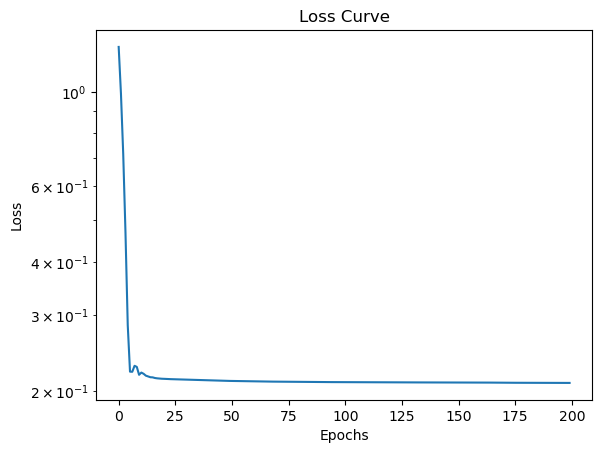

In [74]:
plot_loss_curve(losses)

In [82]:
y_out = model_DNN_norm(input_data_normalised)
y_pred = y_out.detach()

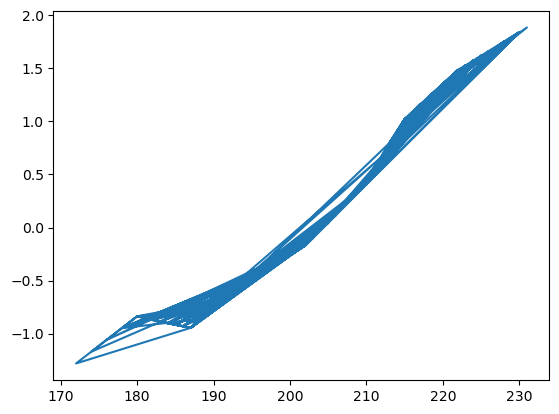

In [85]:
plt.plot(input_data, y_pred)

Text(0.5, 1.0, 'Linear Regression Example')

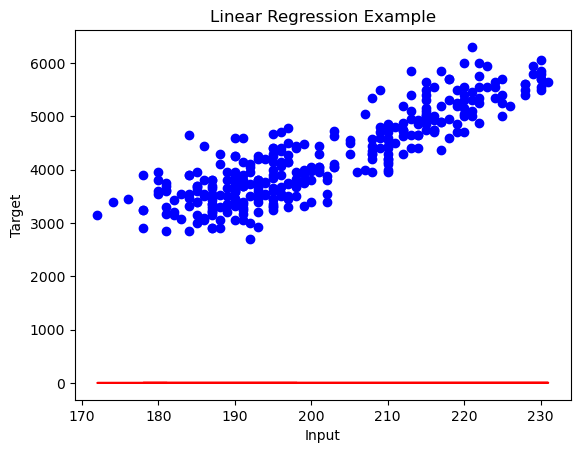

In [83]:
# Plot the original data and the linear regression line
plt.scatter(input_data, target, color='blue', label='Data Points')
plt.plot(input_data, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('Input')
plt.ylabel('Target')
plt.title('Linear Regression Example')

In [91]:
target_normalised.detach().numpy()

array([[-0.56762064],
       [-0.50552547],
       [-1.1885722 ],
       [-0.94019157],
       [-0.69181097],
       [-0.72285855],
       [ 0.5811397 ],
       [-1.2506673 ],
       [-0.50552547],
       [ 0.23961635],
       [-0.6297158 ],
       [-0.94019157],
       [ 0.36380666],
       [-1.0954294 ],
       [-0.00876427],
       [-1.0022867 ],
       [-0.75390613],
       [-0.50552547],
       [-0.31924003],
       [-0.50552547],
       [-0.50552547],
       [-0.81600124],
       [-1.2506673 ],
       [-1.3127625 ],
       [-0.31924003],
       [-1.1885722 ],
       [-0.3813352 ],
       [-1.126477  ],
       [-0.3813352 ],
       [-1.0954294 ],
       [-0.07085942],
       [-0.31924003],
       [-0.81600124],
       [-1.126477  ],
       [ 0.5500921 ],
       [-1.3127625 ],
       [-0.3813352 ],
       [-1.3748577 ],
       [ 0.23961635],
       [-1.499048  ],
       [ 0.48799697],
       [-0.97123915],
       [-0.94019157],
       [-0.07085942],
       [-0.8780964 ],
       [ 0

ValueError: x and y must have same first dimension, but have shapes (333, 1) and (200, 1)

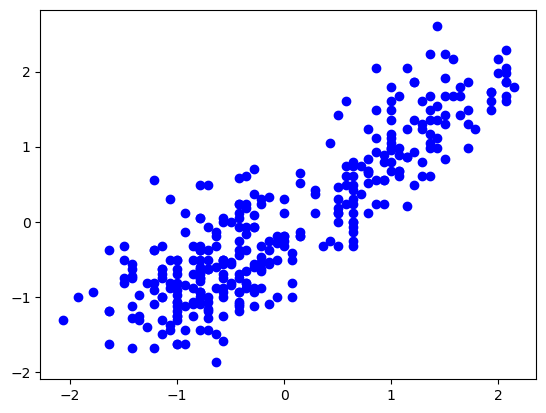

In [92]:
# Plot the original data and the linear regression line
plt.scatter(input_data_normalised, target_normalised.detach().numpy(), color='blue', label='Data Points')
plt.plot(input_data_normalised, y_pred.detach().numpy(), color='red', label='Linear Regression Line')
plt.xlabel('Input')
plt.ylabel('Target')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

Epoch 0, Loss: 0.3252
Epoch 50, Loss: 0.0636
Epoch 100, Loss: 0.0157
Epoch 150, Loss: 0.0106
Epoch 200, Loss: 0.0093
Epoch 250, Loss: 0.0090
Epoch 300, Loss: 0.0090
Epoch 350, Loss: 0.0090
Epoch 400, Loss: 0.0090
Epoch 450, Loss: 0.0090


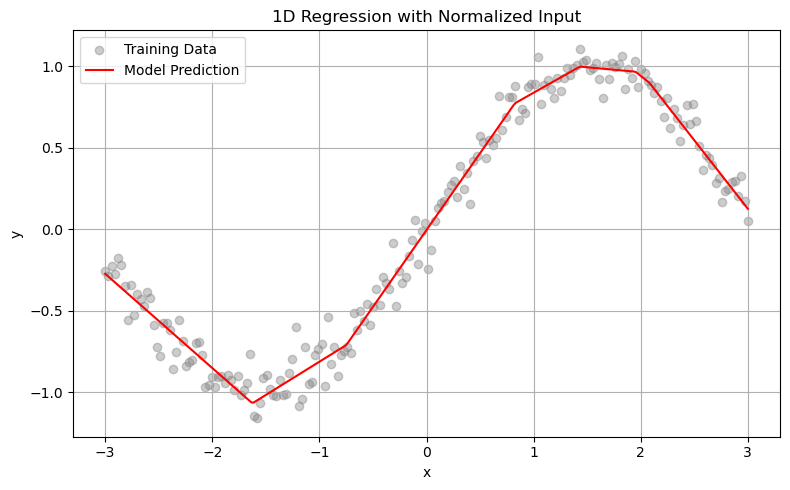

In [86]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# ------------------------
# 1. Generate synthetic data
# ------------------------
torch.manual_seed(0)
N = 200
X = torch.linspace(-3, 3, N).unsqueeze(1)         # shape (N, 1)
y_true = torch.sin(X) + 0.1 * torch.randn_like(X)  # regression target

# ------------------------
# 2. Normalize input manually
# ------------------------
x_mean = X.mean(0, keepdim=True)
x_std = X.std(0, keepdim=True)
X_norm = (X - x_mean) / x_std

# ------------------------
# 3. Define model
# ------------------------
model = nn.Sequential(
    nn.Linear(1, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)

# ------------------------
# 4. Train the model
# ------------------------
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(500):
    optimizer.zero_grad()
    y_pred = model(X_norm)
    loss = criterion(y_pred, y_true)
    loss.backward()
    optimizer.step()
    
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# ------------------------
# 5. Inference + Plot
# ------------------------
# Generate input points in original (unnormalized) space
X_test = torch.linspace(-3, 3, 300).unsqueeze(1)

# Normalize before inference
X_test_norm = (X_test - x_mean) / x_std

with torch.no_grad():
    y_test_pred = model(X_test_norm)

# Plot prediction vs. ground truth
plt.figure(figsize=(8, 5))
plt.scatter(X.numpy(), y_true.numpy(), color='gray', alpha=0.4, label="Training Data")
plt.plot(X_test.numpy(), y_test_pred.numpy(), color='red', label="Model Prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.title("1D Regression with Normalized Input")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
